In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Using a smaller dataset for demonstration (Replace with custom dataset)
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow(x_train_cifar, y_train_cifar, batch_size=32, subset='training')
val_generator = train_datagen.flow(x_train_cifar, y_train_cifar, batch_size=32, subset='validation')

In [4]:
# Transfer Learning with ResNet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_resnet.trainable = False  # Freeze the base model


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training ResNet50 Model")
history_resnet = model_resnet.fit(train_generator, validation_data=val_generator, epochs=10)

Training ResNet50 Model
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.1959 - loss: 2.2026 - val_accuracy: 0.2801 - val_loss: 1.9676
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.2920 - loss: 1.9332 - val_accuracy: 0.2638 - val_loss: 1.9914
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3233 - loss: 1.8668 - val_accuracy: 0.3102 - val_loss: 1.9084
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.3419 - loss: 1.8236 - val_accuracy: 0.3750 - val_loss: 1.7546
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3513 - loss: 1.7952 - val_accuracy: 0.3213 - val_loss: 1.8902
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3591 - loss: 1.7730 - val_accuracy: 0.3506 - val_loss: 1.7850
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3628 - loss: 1.7703 - val_accuracy: 0.3709 - val_loss: 1.7442
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3717 - loss: 1.74

In [7]:
# Transfer Learning with VGG16
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model_vgg.trainable = False  # Freeze the base model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model_vgg = Sequential([
    base_model_vgg,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [9]:
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training VGG16 Model")
history_vgg = model_vgg.fit(train_generator, validation_data=val_generator, epochs=10)

Training VGG16 Model
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4468 - loss: 1.5776 - val_accuracy: 0.5616 - val_loss: 1.2584
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5726 - loss: 1.2247 - val_accuracy: 0.5847 - val_loss: 1.1927
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5961 - loss: 1.1586 - val_accuracy: 0.5972 - val_loss: 1.1633
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6083 - loss: 1.1188 - val_accuracy: 0.6003 - val_loss: 1.1470
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6214 - loss: 1.0758 - val_accuracy: 0.6046 - val_loss: 1.1372
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6362 - loss: 1.0439 - val_accuracy: 0.6100 - val_loss: 1.1215
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6436 - loss: 1.0079 - val_accuracy: 0.6088 - val_loss: 1.1320
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - acc

In [10]:
# Evaluate models
print("Evaluating ResNet50 Model")
resnet_loss, resnet_acc = model_resnet.evaluate(x_test_cifar, y_test_cifar)
print(f"ResNet50 - Loss: {resnet_loss}, Accuracy: {resnet_acc}")


Evaluating ResNet50 Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3987 - loss: 1.6886
ResNet50 - Loss: 1.6933958530426025, Accuracy: 0.3921000063419342


In [11]:
print("Evaluating VGG16 Model")
vgg_loss, vgg_acc = model_vgg.evaluate(x_test_cifar, y_test_cifar)
print(f"VGG16 - Loss: {vgg_loss}, Accuracy: {vgg_acc}")

Evaluating VGG16 Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6059 - loss: 1.1490
VGG16 - Loss: 1.1510701179504395, Accuracy: 0.6040999889373779


In [12]:
# Generate classification report
y_pred_resnet = model_resnet.predict(x_test_cifar).argmax(axis=1)
y_pred_vgg = model_vgg.predict(x_test_cifar).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [13]:
print("Classification Report for ResNet50:")
print(classification_report(y_test_cifar, y_pred_resnet))

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.38      0.55      0.45      1000
           1       0.44      0.45      0.44      1000
           2       0.31      0.27      0.29      1000
           3       0.30      0.07      0.11      1000
           4       0.45      0.25      0.32      1000
           5       0.38      0.36      0.37      1000
           6       0.44      0.36      0.40      1000
           7       0.31      0.65      0.42      1000
           8       0.44      0.53      0.48      1000
           9       0.53      0.43      0.48      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.38     10000
weighted avg       0.40      0.39      0.38     10000



In [14]:
print("Classification Report for VGG16:")
print(classification_report(y_test_cifar, y_pred_vgg))


Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1000
           1       0.69      0.66      0.67      1000
           2       0.59      0.47      0.52      1000
           3       0.47      0.37      0.41      1000
           4       0.66      0.41      0.51      1000
           5       0.49      0.57      0.53      1000
           6       0.53      0.79      0.63      1000
           7       0.62      0.72      0.67      1000
           8       0.73      0.73      0.73      1000
           9       0.60      0.67      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



In [15]:
# Visualization function
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()


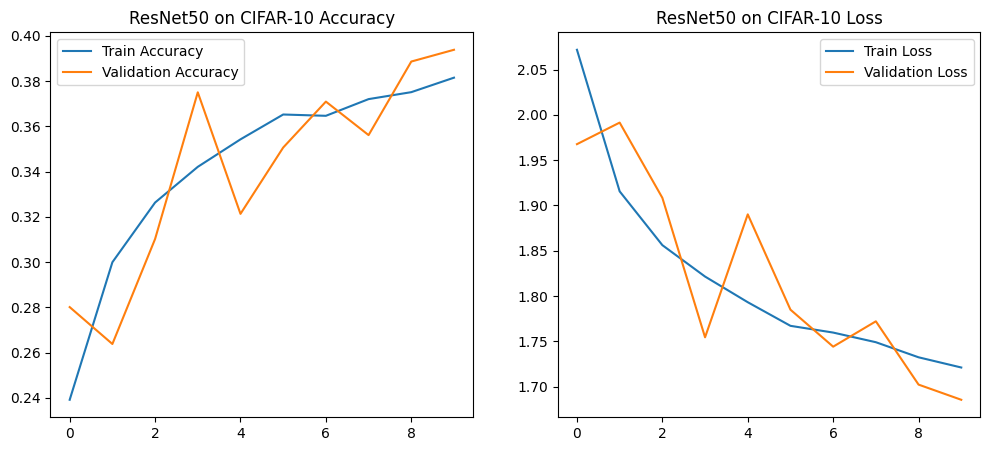

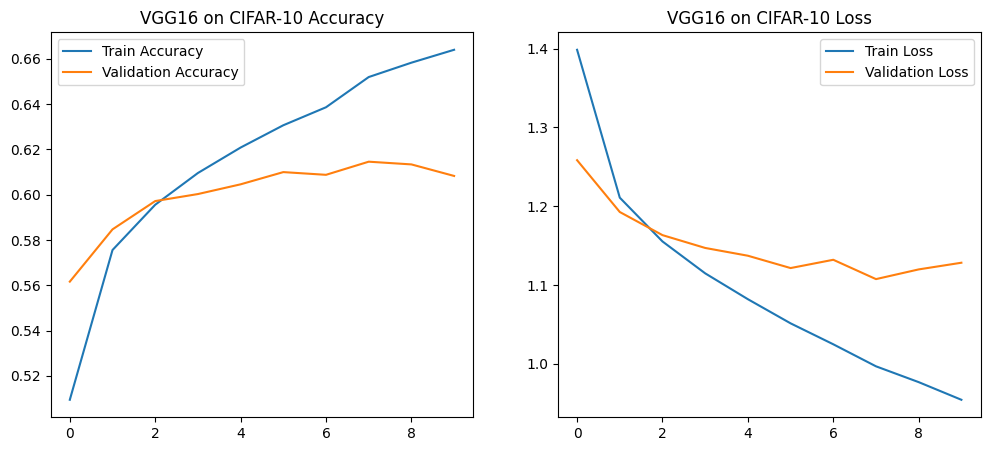

In [16]:
# Plot results
plot_history(history_resnet, "ResNet50 on CIFAR-10")
plot_history(history_vgg, "VGG16 on CIFAR-10")

In [17]:
# Summary of results
print("Comparison of ResNet50 and VGG16:")
print(f"ResNet50 - Accuracy: {resnet_acc:.2f}, Loss: {resnet_loss:.2f}")
print(f"VGG16 - Accuracy: {vgg_acc:.2f}, Loss: {vgg_loss:.2f}")


Comparison of ResNet50 and VGG16:
ResNet50 - Accuracy: 0.39, Loss: 1.69
VGG16 - Accuracy: 0.60, Loss: 1.15


In [ ]:
#By Riya Bablu Gupta